# Imports

In [ ]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error     
import datetime
from datetime import datetime
from google.colab import files
import io
from itertools import cycle
import plotly.express as px
import plotly.graph_objects as go
import sklearn.metrics  as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)




In [ ]:
#uploaded = files.upload()

In [ ]:
#eth = pd.read_csv(io.BytesIO(uploaded['Ethereum.csv']))
eth = pd.read_csv('Ethereum.csv')

# Info about dataframes

In [ ]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(eth)

##################### Shape #####################
(2502, 7)
##################### Types #####################
Tarih     object
Şimdi     object
Açılış    object
Yüksek    object
Düşük     object
Hac.      object
Fark %    object
dtype: object
##################### Head #####################
        Tarih     Şimdi    Açılış    Yüksek     Düşük     Hac. Fark %
0  14.01.2023  1.512,40  1.450,86  1.576,83  1.449,47    1,08M  4,24%
1  13.01.2023  1.450,86  1.416,08  1.463,53  1.401,98  552,05K  2,46%
2  12.01.2023  1.416,08  1.389,84  1.435,95  1.365,78  960,62K  1,89%
3  11.01.2023  1.389,84  1.335,14  1.392,40  1.322,10  509,99K  4,10%
4  10.01.2023  1.335,13  1.320,51  1.344,42  1.316,95  487,24K  1,11%
##################### Tail #####################
           Tarih  Şimdi Açılış Yüksek  Düşük    Hac.   Fark %
2497  14.03.2016  12,50  15,07  15,07  11,40  92,18K  -17,05%
2498  13.03.2016  15,07  12,92  15,07  12,92   1,30K   16,64%
2499  12.03.2016  12,92  11,95  13,45  11,95   0,83K 

# Feauture Engineering

In [ ]:
def convert_date(df):
  df["Dates"]=pd.to_datetime(df["Tarih"],format="%d.%m.%Y")  
  df["Hacim"]=df["Hac."]
  df.drop("Tarih",inplace=True,axis=1)
  df.drop("Hac.",inplace=True,axis=1)

In [ ]:
convert_date(eth)

In [ ]:
eth["Açılış"]=eth["Açılış"].str.replace(",","-")
eth["Açılış"]=eth["Açılış"].str.replace(".","")
eth["Açılış"]=eth["Açılış"].str.replace("-",".")

eth["Şimdi"]=eth["Şimdi"].str.replace(",","-")
eth["Şimdi"]=eth["Şimdi"].str.replace(".","")
eth["Şimdi"]=eth["Şimdi"].str.replace("-",".")

eth["Yüksek"]=eth["Yüksek"].str.replace(",","-")
eth["Yüksek"]=eth["Yüksek"].str.replace(".","")
eth["Yüksek"]=eth["Yüksek"].str.replace("-",".")

eth["Düşük"]=eth["Düşük"].str.replace(",","-")
eth["Düşük"]=eth["Düşük"].str.replace(".","")
eth["Düşük"]=eth["Düşük"].str.replace("-",".")

eth["Fark %"]=eth["Fark %"].str.replace(",",".")



<ipython-input-432-fa14aeee685e>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-432-fa14aeee685e>:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-432-fa14aeee685e>:10: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-432-fa14aeee685e>:14: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
eth.dtypes

Şimdi             object
Açılış            object
Yüksek            object
Düşük             object
Fark %            object
Dates     datetime64[ns]
Hacim             object
dtype: object

In [ ]:
eth["Açılış"] = eth["Açılış"].astype(float)
eth["Şimdi"] = eth["Şimdi"].astype(float)
eth["Yüksek"] = eth["Yüksek"].astype(float)


In [ ]:
eth.head()

,Şimdi,Açılış,Yüksek,Düşük,Fark %,Dates,Hacim
0,1512.40,1450.86,1576.83,1449.47,4.24%,2023-01-14,"1,08M"
1,1450.86,1416.08,1463.53,1401.98,2.46%,2023-01-13,"552,05K"
2,1416.08,1389.84,1435.95,1365.78,1.89%,2023-01-12,"960,62K"
3,1389.84,1335.14,1392.40,1322.10,4.10%,2023-01-11,"509,99K"
4,1335.13,1320.51,1344.42,1316.95,1.11%,2023-01-10,"487,24K"


In [ ]:
y_2016 = eth.loc[(eth['Dates'] >= "2016-03-10")
                     & (eth['Dates'] < "2017-01-01")]

In [ ]:
month_wise= y_2016.groupby(y_2016['Dates'].dt.strftime('%B'))[['Açılış','Şimdi']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
month_wise_2016 = month_wise.reindex(new_order, axis=0)
month_wise_2016

,Açılış,Şimdi
Dates,,
January,NaN,NaN
February,NaN,NaN
March,11.731364,11.717727
April,9.033333,8.986667
May,11.184839,11.334194
June,14.416667,14.378000
July,11.891935,11.886129
August,11.002581,10.926774
September,12.461000,12.505667


In [ ]:
y_2017 = eth.loc[(eth['Dates'] >= "2017-01-01")
                     & (eth['Dates'] < "2018-01-01")]



In [ ]:
month_wise= y_2017.groupby(y_2017['Dates'].dt.strftime('%B'))[['Açılış','Şimdi']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
month_wise_2017 = month_wise.reindex(new_order, axis=0)
month_wise_2017

,Açılış,Şimdi
Dates,,
January,10.073871,10.158065
February,12.182857,12.359643
March,33.317742,34.410000
April,51.104667,52.231000
May,117.898387,122.247742
June,297.625333,299.534667
July,222.082581,219.669355
August,294.591613,300.607419
September,298.622667,295.827333


In [ ]:
y_2018 = eth.loc[(eth['Dates'] >= "2018-01-01")
                     & (eth['Dates'] < "2019-01-01")]



In [ ]:
month_wise= y_2018.groupby(y_2018['Dates'].dt.strftime('%B'))[['Açılış','Şimdi']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
month_wise_2018 = month_wise.reindex(new_order, axis=0)
month_wise_2018

,Açılış,Şimdi
Dates,,
January,1076.500323,1088.840968
February,877.224286,867.886071
March,638.627742,623.892258
April,511.847000,521.033667
May,680.442581,677.234516
June,523.246667,519.083000
July,462.779032,462.080645
August,325.606452,320.737097
September,228.615333,226.968333


In [ ]:
y_2019 = eth.loc[(eth['Dates'] >= "2019-01-01")
                     & (eth['Dates'] < "2020-01-01")]



In [ ]:
month_wise= y_2019.groupby(y_2019['Dates'].dt.strftime('%B'))[['Açılış','Şimdi']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
month_wise_2019 = month_wise.reindex(new_order, axis=0)
month_wise_2019

,Açılış,Şimdi
Dates,,
January,127.434516,126.626452
February,125.701429,126.726786
March,136.172581,136.375161
April,164.344333,165.005667
May,216.219677,219.652581
June,273.389000,274.209333
July,249.753226,247.334516
August,200.361935,198.890323
September,185.030000,185.316000


In [ ]:
y_2020 = eth.loc[(eth['Dates'] >= "2020-01-01")
                     & (eth['Dates'] < "2021-01-01")]



In [ ]:
month_wise= y_2020.groupby(y_2020['Dates'].dt.strftime('%B'))[['Açılış','Şimdi']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
month_wise_2020 = month_wise.reindex(new_order, axis=0)
month_wise_2020

,Açılış,Şimdi
Dates,,
January,155.016774,156.651613
February,237.458966,238.761724
March,162.911290,160.181613
April,168.847667,171.292667
May,206.620323,207.449677
June,236.127333,235.918333
July,255.664194,259.569355
August,398.930645,401.726774
September,370.269333,367.772000


In [ ]:
y_2021 = eth.loc[(eth['Dates'] >= "2021-01-01")
                     & (eth['Dates'] < "2022-01-01")]



In [ ]:
month_wise= y_2021.groupby(y_2021['Dates'].dt.strftime('%B'))[['Açılış','Şimdi']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
month_wise_2021 = month_wise.reindex(new_order, axis=0)
month_wise_2021

,Açılış,Şimdi
Dates,,
January,1183.078065,1201.331935
February,1695.655714,1699.406429
March,1716.811290,1732.948710
April,2264.717333,2293.004667
May,3141.825484,3139.756129
June,2347.887667,2333.217333
July,2121.492581,2129.402903
August,3068.073226,3097.133548
September,3350.157333,3335.653000


In [ ]:
y_2022 = eth.loc[(eth['Dates'] >= "2022-01-01")
                     & (eth['Dates'] < "2023-01-01")]

month_wise= y_2022.groupby(y_2022['Dates'].dt.strftime('%B'))[['Açılış','Şimdi']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
month_wise_2022 = month_wise.reindex(new_order, axis=0)
month_wise_2022


,Açılış,Şimdi
Dates,,
January,3084.661613,3052.807419
February,2858.382857,2866.558929
March,2863.822258,2875.429355
April,3113.738000,3095.199000
May,2212.804839,2187.182581
June,1411.417667,1382.460667
July,1339.405161,1359.150968
August,1702.951935,1698.932258
September,1491.399333,1483.870667


In [ ]:
y_overall = eth.loc[(eth['Dates'] >= "2016-03-10")
                     & (eth['Dates'] < "2023-01-01")]

In [ ]:
month_wise= y_overall.groupby(y_overall['Dates'].dt.strftime('%B'))[['Açılış','Şimdi']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
month_wise_overall = month_wise.reindex(new_order, axis=0)
month_wise_overall

,Açılış,Şimdi
Dates,,
January,939.460860,939.402742
February,963.446331,964.297929
March,828.652115,830.375673
April,897.661762,900.964762
May,940.999447,937.836774
June,729.158619,722.685905
July,666.152673,669.870553
August,857.359770,861.279171
September,848.079286,843.987571


In [ ]:
y_overall["Düşük"]=y_overall["Düşük"].astype(str).astype(float)

<ipython-input-451-e52a15f9f40b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_list =(month_wise_2016,month_wise_2017,month_wise_2018,month_wise_2019,month_wise_2020,month_wise_2021,month_wise_2022)

In [ ]:
years = [2016,2017,2018,2019,2020,2021,2022]

In [ ]:
def graph_by_year(df):
  x=0
  for df in df_list: 
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df.index,
        y=df['Açılış'],
        name='Açılış Ücreti',
        marker_color='crimson'
    ))
    fig.add_trace(go.Bar(
        x=df.index,
        y=df['Şimdi'],
        name='Kapanış Ücreti',
        marker_color='lightsalmon'
    ))
    fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Aylık Bazda Ethereum Açılış ve Kapanış Ücretleri Karşılaştırması '+ str(years[x]))
    x+=1
    fig.show()
  fig = go.Figure()
  fig.add_trace(go.Bar(
      x=month_wise_overall.index,
      y=month_wise_overall['Açılış'],
      name='Açılış Ücreti',
      marker_color='crimson'
  ))
  fig.add_trace(go.Bar(
      x=month_wise_overall.index,
      y=month_wise_overall['Şimdi'],
      name='Kapanış Ücreti',
      marker_color='lightsalmon'
  ))
  fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Aylık Bazda Ethereum Açılış ve Kapanış Ücretleri Karşılaştırması 2016-2023')  
  fig.show()   

In [ ]:
graph_by_year(df_list)

In [ ]:
names = cycle(['Open Price','Close Price','High Price','Low Price'])

fig = px.line(y_overall, x=y_overall.Dates, y=[y_overall['Açılış'], y_overall['Şimdi'], 
                                          y_overall['Yüksek'], y_overall['Düşük']],
             labels={'Dates': 'Dates','value':'Currency Value'})
fig.update_layout(title_text='Ethereum Analysis Chart', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Model

In [ ]:
closedf = eth[['Dates','Şimdi']]

In [ ]:
fig = px.line(closedf, x=closedf.Dates, y=closedf.Şimdi,labels={'date':'Dates','Close':'Şimdi'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Etherium close price 2016-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedf = closedf[closedf['Dates'] > '2021-01-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  743


In [ ]:
fig = px.line(closedf, x=closedf.Dates, y=closedf.Şimdi,labels={'date':'Dates','close':'Şimdi'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Ethereum close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
del closedf['Dates']
sc=MinMaxScaler(feature_range=(0,1))
closedf=sc.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(743, 1)


In [ ]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (520, 1)
test_data:  (223, 1)


In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from keras.layers import LSTM
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150,batch_size=32,verbose=1)

Epoch 1/150
16/16 [==============================] - 2s 24ms/step - loss: 0.1714 - val_loss: 0.0645
Epoch 2/150
16/16 [==============================] - 0s 8ms/step - loss: 0.1166 - val_loss: 0.0347
Epoch 3/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0656 - val_loss: 0.0144
Epoch 4/150
16/16 [==============================] - 0s 10ms/step - loss: 0.0267 - val_loss: 0.0102
Epoch 5/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0127 - val_loss: 0.0165
Epoch 6/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0106 - val_loss: 0.0103
Epoch 7/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0054 - val_loss: 0.0044
Epoch 8/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 9/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0023 - val_loss: 0.0038
Epoch 10/150
16/16 [==============================] - 0s 18ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 

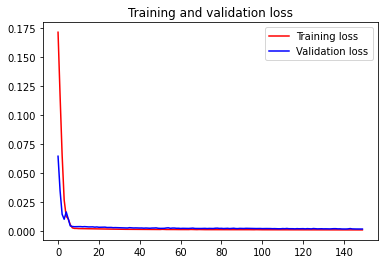

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

7/7 [==============================] - 0s 3ms/step


((504, 1), (207, 1))

In [ ]:
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)
original_ytrain = sc.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = sc.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  125.64006560794515
Train data MSE:  15785.426085968762
Train data MAE:  91.4096288674975
-------------------------------------------------------------------------------------
Test data RMSE:  168.83692523202188
Test data MSE:  28505.90732180335
Test data MAE:  117.55006423139342


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9866108209291946
Test data R2 score: 0.9301271036904881


In [ ]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

testPredictPlot = np.empty_like(closedf)

testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Dates'],
                       'original_close': close_stock['Şimdi'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (743, 1)
Test predicted data:  (743, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = sc.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = sc.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=sc.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
projection=14
eth["Prediction"]=eth["Şimdi"].shift(-projection)
eth

,Şimdi,Açılış,Yüksek,Düşük,Fark %,Dates,Hacim,Prediction
0,1512.40,1450.86,1576.83,1449.47,4.24%,2023-01-14,"1,08M",1195.67
1,1450.86,1416.08,1463.53,1401.98,2.46%,2023-01-13,"552,05K",1199.80
2,1416.08,1389.84,1435.95,1365.78,1.89%,2023-01-12,"960,62K",1200.84
3,1389.84,1335.14,1392.40,1322.10,4.10%,2023-01-11,"509,99K",1189.98
4,1335.13,1320.51,1344.42,1316.95,1.11%,2023-01-10,"487,24K",1211.60
...,...,...,...,...,...,...,...,...
2497,12.50,15.07,15.07,11.40,-17.05%,2016-03-14,"92,18K",NaN
2498,15.07,12.92,15.07,12.92,16.64%,2016-03-13,"1,30K",NaN
2499,12.92,11.95,13.45,11.95,8.12%,2016-03-12,"0,83K",NaN
2500,11.95,11.75,11.95,11.75,1.70%,2016-03-11,"0,18K",NaN


* Bundan 14 gün sonra Eth değeri ne olacağının tahmini.

In [ ]:
#Bağımsız bir veri seti oluşturarak 14 günlük tahmini daha iyi yapalım.
X=np.array(eth["Şimdi"])
X=(eth["Şimdi"])[: - projection].values
X

array([1512.4 , 1450.86, 1416.08, ...,   11.  ,   10.67,   11.2 ])

In [ ]:
y=eth["Prediction"].values

y=y[: - projection]
y

array([1195.67, 1199.8 , 1200.84, ...,   12.92,   11.95,   11.75])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
linReg = LinearRegression()

In [ ]:
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [ ]:
linReg.fit(x_train, y_train)


LinearRegression()

In [ ]:
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False)

LinearRegression(normalize=False)

In [ ]:
linReg_confidence=linReg.score(x_test,y_test)
print("Linear Regression Confidence: ",linReg_confidence)

Linear Regression Confidence:  0.9609652389848485


In [ ]:
x_projection=np.array(eth[["Şimdi"]])[: - projection]
df = pd.DataFrame (x_projection, columns = ['predict'])
df

,predict
0,1512.40
1,1450.86
2,1416.08
3,1389.84
4,1335.13
...,...
2483,11.62
2484,10.40
2485,11.00
2486,10.67


In [ ]:
linReg_prediction=linReg.predict(x_projection)
linReg_prediction[0]

1490.7800134519393